In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Show basic info
print(train.info())
print(train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27          

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


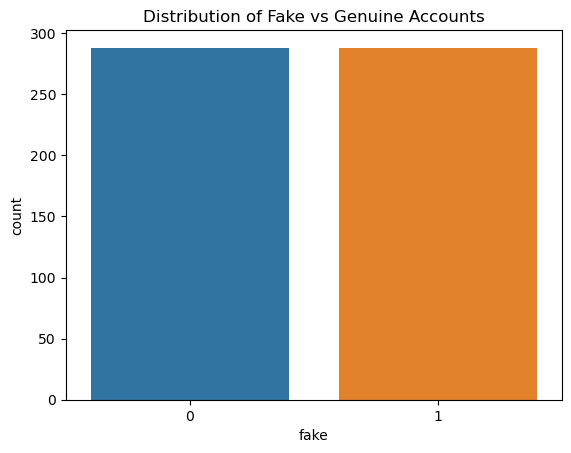

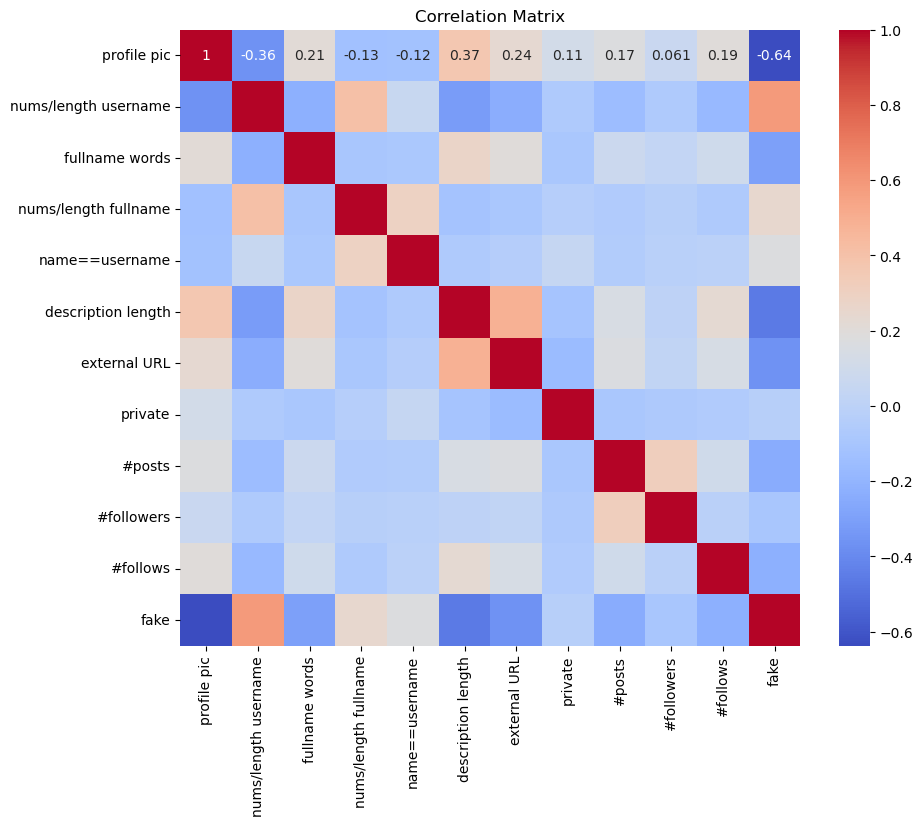

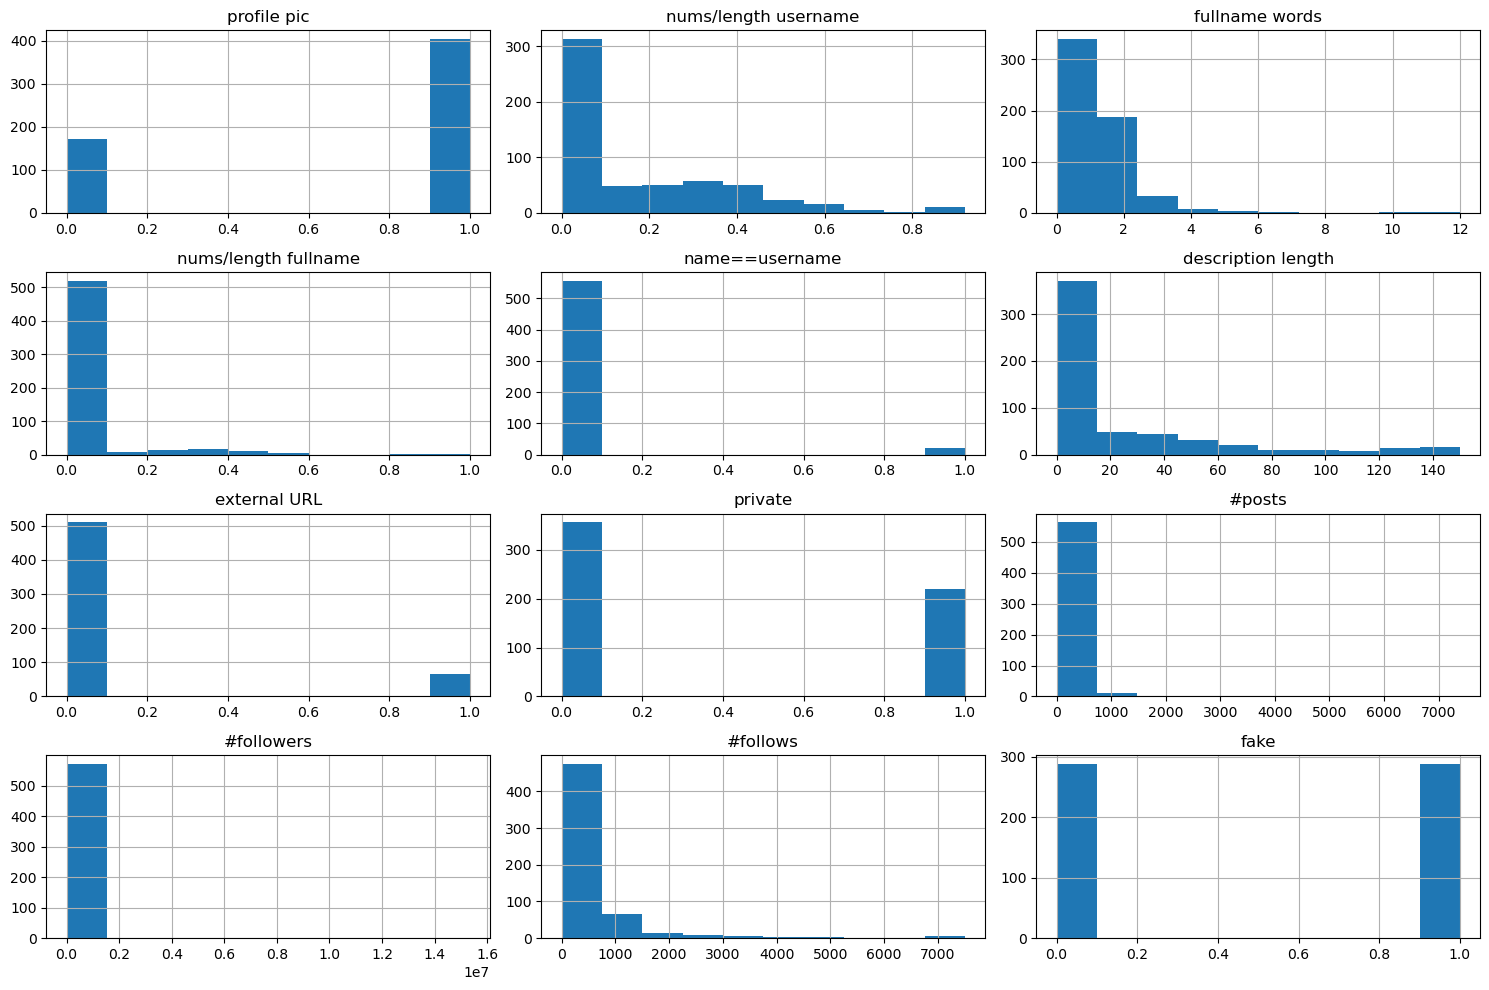

In [5]:
# Check missing values
print(train.isnull().sum())

# Class distribution
sns.countplot(x='fake', data=train)
plt.title("Distribution of Fake vs Genuine Accounts")
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Histogram of key features
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


In [15]:
# Optional: add follower-following ratio
train['follower_following_ratio'] = train['#followers'] / (train['#follows'] + 1)
test['follower_following_ratio'] = test['#followers'] / (test['#follows'] + 1)

# Features and label
X = train.drop(columns=['fake'])
y = train['fake']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test.drop(columns=['fake']))


In [13]:
# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try Random Forest, Gradient Boosting, Logistic Regression
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_val, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_val, preds))
    print("Classification Report:\n", classification_report(y_val, preds))



Random Forest Performance:
Accuracy: 0.896551724137931
Confusion Matrix:
 [[58  5]
 [ 7 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91        63
           1       0.90      0.87      0.88        53

    accuracy                           0.90       116
   macro avg       0.90      0.89      0.90       116
weighted avg       0.90      0.90      0.90       116


Gradient Boosting Performance:
Accuracy: 0.9224137931034483
Confusion Matrix:
 [[59  4]
 [ 5 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.92      0.91      0.91        53

    accuracy                           0.92       116
   macro avg       0.92      0.92      0.92       116
weighted avg       0.92      0.92      0.92       116


Logistic Regression Performance:
Accuracy: 0.8620689655172413
Confusion Matrix:
 [[60  3]
 [13 40]]
Clas

In [17]:
# Choose the best model (e.g., Gradient Boosting)
final_model = GradientBoostingClassifier()
final_model.fit(X_scaled, y)

test_preds = final_model.predict(X_test_scaled)
print("Test Set Performance:")
print("Accuracy:", accuracy_score(test['fake'], test_preds))
print("Confusion Matrix:\n", confusion_matrix(test['fake'], test_preds))
print("Classification Report:\n", classification_report(test['fake'], test_preds))


Test Set Performance:
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[56  4]
 [ 4 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        60
           1       0.93      0.93      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



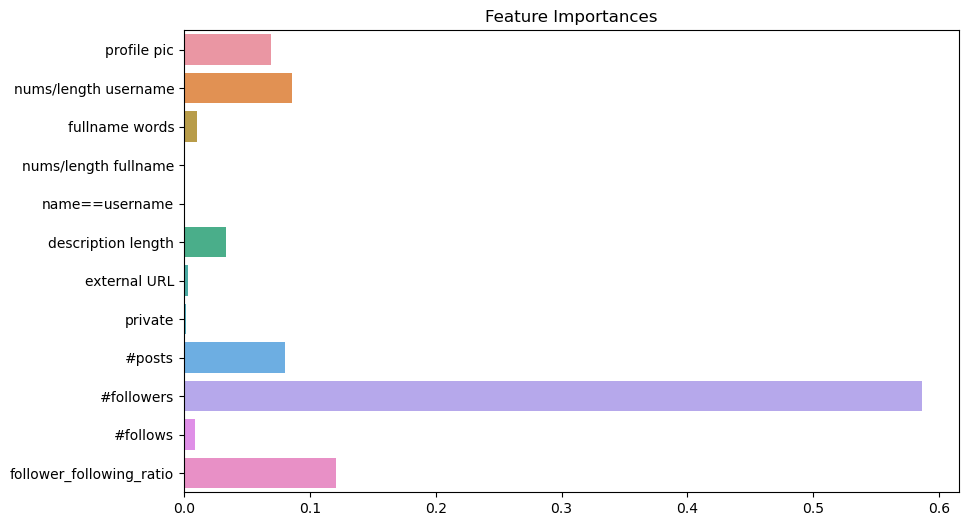

In [19]:
importances = final_model.feature_importances_
feature_names = train.drop(columns=['fake']).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()
